# Projet_ML
## 2022-2023
---

**Importation des bibliothèques**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from google.colab import drive

**Assemblage Google Drive dans Colaboratory**

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


**Lecture des fichiers *train_Insurance.csv* & *test_Insurance.csv***


In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/ProjetML_Insurance/train_Insurance.csv')
test_data = pd.read_csv('/content/drive/MyDrive/ProjetML_Insurance/test_Insurance.csv')


---

### **Analyse de données & Data preprocessing** 

In [ ]:
train_data.head(3)

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H13501,2012,1.0,1,N,V,V,U,1240.0,Wood-framed,without,75117,non
1,H14962,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,62916,non
2,H17755,2013,1.0,1,V,N,O,R,4984.0,Non-combustible,4,31149,oui


In [ ]:
test_data.head(3)

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H3733,2013,1.0,0,V,V,V,U,3760.0,Fire-resistive,without,43157,oui
1,H16909,2015,1.0,0,V,N,O,R,1452.0,Fire-resistive,5,58194,non
2,H16867,2013,1.0,1,V,N,O,R,1944.0,Ordinary,6,92050,oui


In [ ]:
train_data.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension
count,5012.000000,5012.000000,5012.000000,4935.000000
mean,2013.660215,0.869713,0.301077,1876.898683
std,1.383134,0.219496,0.458772,2267.277397
min,2012.000000,0.500000,0.000000,1.000000
25%,2012.000000,0.500000,0.000000,520.000000
50%,2013.000000,1.000000,0.000000,1067.000000
75%,2015.000000,1.000000,1.000000,2280.000000
max,2016.000000,1.000000,1.000000,20840.000000


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012 entries, 0 to 5011
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         5012 non-null   object 
 1   YearOfObservation   5012 non-null   int64  
 2   Insured_Period      5012 non-null   float64
 3   Residential         5012 non-null   int64  
 4   Building_Painted    5012 non-null   object 
 5   Building_Fenced     5012 non-null   object 
 6   Garden              5008 non-null   object 
 7   Settlement          5012 non-null   object 
 8   Building Dimension  4935 non-null   float64
 9   Building_Type       5012 non-null   object 
 10  NumberOfWindows     5012 non-null   object 
 11  Geo_Code            4939 non-null   object 
 12  Claim               5012 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 509.2+ KB


### ***Nettoyage des données:***

In [ ]:
train_data.isnull().sum()

Customer Id            0
YearOfObservation      0
Insured_Period         0
Residential            0
Building_Painted       0
Building_Fenced        0
Garden                 4
Settlement             0
Building Dimension    77
Building_Type          0
NumberOfWindows        0
Geo_Code              73
Claim                  0
dtype: int64

In [ ]:
#len(train_data[(train_data["Building Dimension"].isnull()) & (train_data["Settlement"]=="U")])
#train_data["Building Dimension"][1]

In [ ]:
# Calculate the mean of the "Building Dimension" column
mean_building_dim_U = train_data[train_data["Settlement"]=="U"]['Building Dimension'].mean()
mean_building_dim_R = train_data[train_data["Settlement"]=="R"]['Building Dimension'].mean()
mean_building_dim = train_data[train_data["NumberOfWindows"]=="without"]['Building Dimension'].mean()
print(mean_building_dim_U)
print(mean_building_dim_R)
print(mean_building_dim)
# Replace missing values with the mean value
train_data.loc[(train_data['Settlement'] == 'U') & (pd.isna(train_data['Building Dimension'])), 'Building Dimension'] = mean_building_dim_U
train_data.loc[(train_data['Settlement'] == 'R') & (pd.isna(train_data['Building Dimension'])), 'Building Dimension'] = mean_building_dim_R


#train_data['Building Dimension'].fillna(mean_building_dim, inplace=True)

1546.0954564401834
2189.8312302839117
1546.0954564401834


In [ ]:
train_data.isnull().sum()

Customer Id            0
YearOfObservation      0
Insured_Period         0
Residential            0
Building_Painted       0
Building_Fenced        0
Garden                 4
Settlement             0
Building Dimension     0
Building_Type          0
NumberOfWindows        0
Geo_Code              73
Claim                  0
dtype: int64

In [ ]:
# Count the number of occurrences of each category
geo_code_counts = train_data['Geo_Code'].value_counts()

# Determine the most frequent category
most_frequent_geo_code = geo_code_counts.index[0]

# Replace missing values with the most frequent category
train_data['Geo_Code'].fillna(most_frequent_geo_code, inplace=True)


In [ ]:
# Replace missing values with "O" (because whenever "Settlement" =="R" => "Garden"=="O")
train_data['Garden'].fillna("O", inplace=True)

In [ ]:
test_data.isnull().sum()

Customer Id            0
YearOfObservation      0
Insured_Period         0
Residential            0
Building_Painted       0
Building_Fenced        0
Garden                 3
Settlement             0
Building Dimension    29
Building_Type          0
NumberOfWindows        0
Geo_Code              29
Claim                  0
dtype: int64

In [ ]:
# Calculate the mean of the "Building Dimension" column
mean_building_dim_U = test_data[test_data["Settlement"]=="U"]['Building Dimension'].mean()
mean_building_dim_R = test_data[test_data["Settlement"]=="R"]['Building Dimension'].mean()

# Replace missing values with the mean value
test_data.loc[(test_data['Settlement'] == 'U') & (pd.isna(test_data['Building Dimension'])), 'Building Dimension'] = mean_building_dim_U
test_data.loc[(test_data['Settlement'] == 'R') & (pd.isna(test_data['Building Dimension'])), 'Building Dimension'] = mean_building_dim_R

# Count the number of occurrences of each category of "Geo_Code"
geo_code_counts = test_data['Geo_Code'].value_counts()

# Determine the most frequent category
most_frequent_geo_code = geo_code_counts.index[0]

# Replace missing values with the most frequent category
test_data['Geo_Code'].fillna(most_frequent_geo_code, inplace=True)

# Replace missing values with "O" (because whenever "Settlement" =="R" => "Garden"=="O")
test_data['Garden'].fillna("O", inplace=True)

In [ ]:
test_data.isnull().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64

In [ ]:
data=pd.concat([train_data,test_data]).sort_values(by=['YearOfObservation'])
data.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H13501,2012,1.0,1,N,V,V,U,1240.0,Wood-framed,without,75117,non
4626,H17361,2012,1.0,0,V,N,O,R,400.0,Non-combustible,2,11262,oui
4629,H4428,2012,1.0,0,V,V,V,U,4176.0,Wood-framed,without,6083,non
4630,H18396,2012,0.5,1,V,N,O,R,850.0,Non-combustible,6,95585,non
1779,H16858,2012,1.0,1,V,N,O,R,290.0,Non-combustible,2,78490,non


### ***Quelques analyses:***

<Axes: title={'center': 'Distribution de reclamation'}, xlabel='Claim', ylabel='count'>

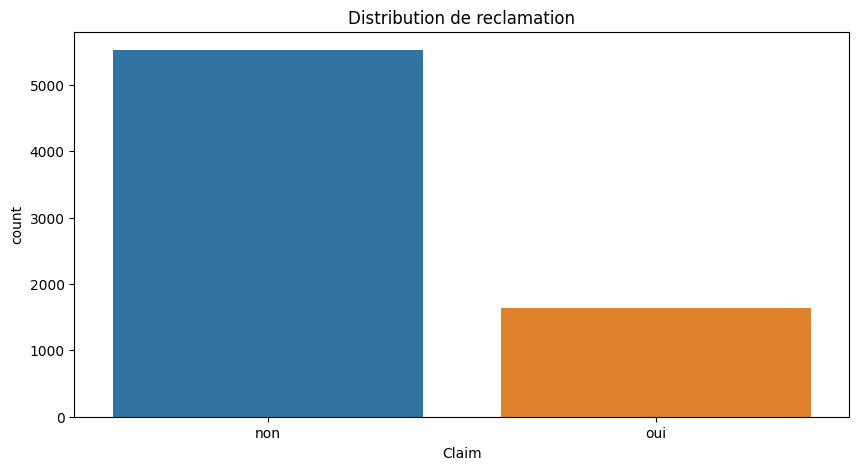

In [ ]:
fig = plt.figure(figsize=(10, 5))
plt.title('Distribution de reclamation')
sns.countplot(x='Claim', data=data)

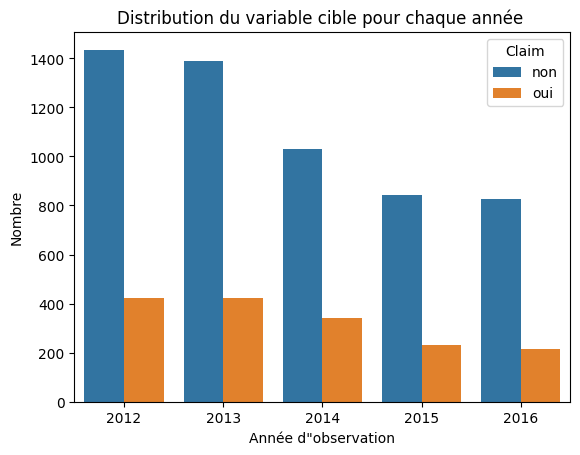

In [ ]:
sns.countplot(x='YearOfObservation', hue='Claim', data=data)
plt.title('Distribution du variable cible pour chaque année ')
plt.xlabel('Année d"observation')
plt.ylabel('Nombre')
plt.show()

<Axes: title={'center': 'Nombre de bâtiments pour chaque periode assurée '}, xlabel='Insured_Period', ylabel='count'>

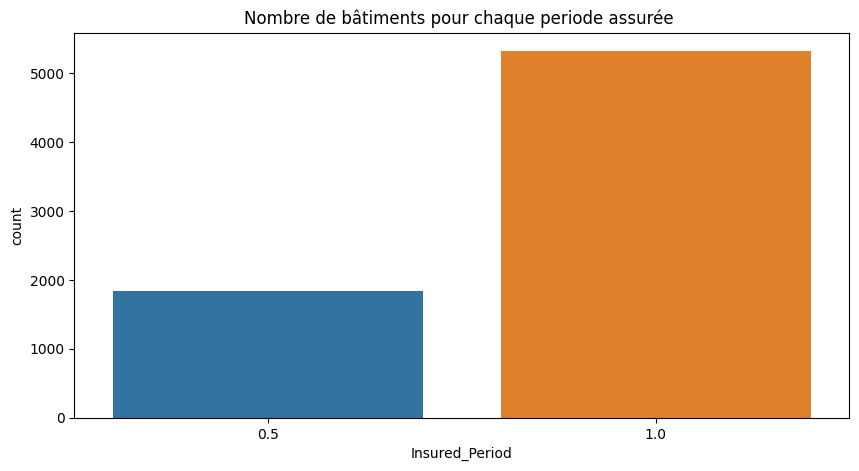

In [ ]:
fig = plt.figure(figsize=(10, 5))
plt.title('Nombre de bâtiments pour chaque periode assurée ')
sns.countplot(x='Insured_Period', data=data)

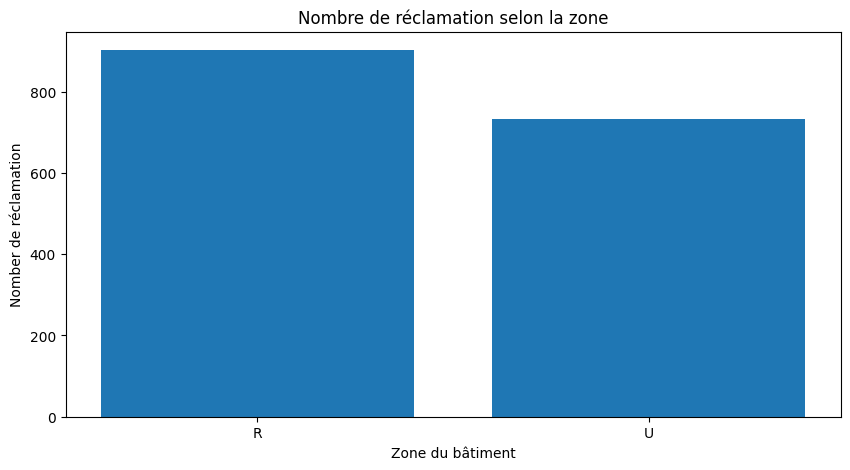

In [ ]:
# Créer un sous-ensemble contenant seulement les demandes de claim= oui
claims = data[data['Claim']=='oui']

# Compter le nombre de demandes de sinistre pour chaque type d'appartement
claim_counts = claims['Settlement'].value_counts()

fig = plt.figure(figsize=(10, 5))
# Créer un graphe en barres
plt.bar(claim_counts.index, claim_counts.values)

# Ajouter des labels pour l'axe x et l'axe y, et un titre
plt.xlabel('Zone du bâtiment')
plt.ylabel('Nomber de réclamation')
plt.title('Nombre de réclamation selon la zone')

# Afficher le graphe
plt.show()

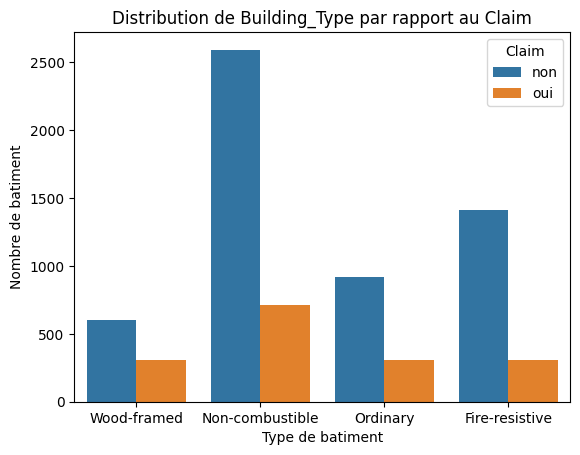

In [ ]:
sns.countplot(x='Building_Type', hue='Claim', data=data)
plt.title('Distribution de Building_Type par rapport au Claim')
plt.xlabel('Type de batiment')
plt.ylabel('Nombre de batiment')
plt.show()

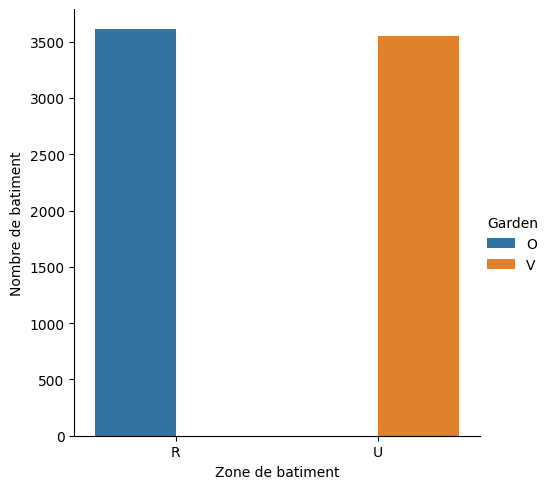

In [ ]:
# Création d'un sous-ensemble des données pour les variables Settlement et Garden
subset = data[['Settlement', 'Garden']].dropna()

# Comptage du nombre de jardins présents et absents par Settlement
count_df = subset.groupby(['Settlement', 'Garden']).size().reset_index(name='count')

# Création du graphe
sns.catplot(x='Settlement', y='count', hue='Garden', kind='bar', data=count_df)

# Affichage du graphe

plt.xlabel('Zone de batiment')
plt.ylabel('Nombre de batiment')
plt.show()

In [ ]:
train_data.drop(['Customer Id'],inplace=True,axis=1)
test_data.drop(['Customer Id'],inplace=True,axis=1)
data.drop(['Customer Id'],inplace=True,axis=1)

### ***Pour sélectionner les descripteurs les plus discriminants, on va effectuer une analyse de corrélation et éliminer les descripteurs fortement corrélés:***

Lorsque deux descripteurs sont fortement corrélés, ils contiennent une grande partie des mêmes informations, ce qui peut entraîner une instabilité dans les estimations des coefficients de modèle et une mauvaise généralisation du modèle sur de nouvelles données. En éliminant les descripteurs fortement corrélés, on peut améliorer la performance du modèle, réduire la complexité et faciliter son interprétation.

In [ ]:
from scipy.stats import chi2_contingency

# Définir une fonction pour calculer Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

# Calculer la matrice de corrélation Cramer's V
corr_matrix = pd.DataFrame(index=train_data.columns, columns=train_data.columns)
for i in range(len(train_data.columns)):
    for j in range(len(train_data.columns)):
        corr_matrix.iloc[i,j] = cramers_v(train_data.iloc[:,i], train_data.iloc[:,j])

<Axes: >

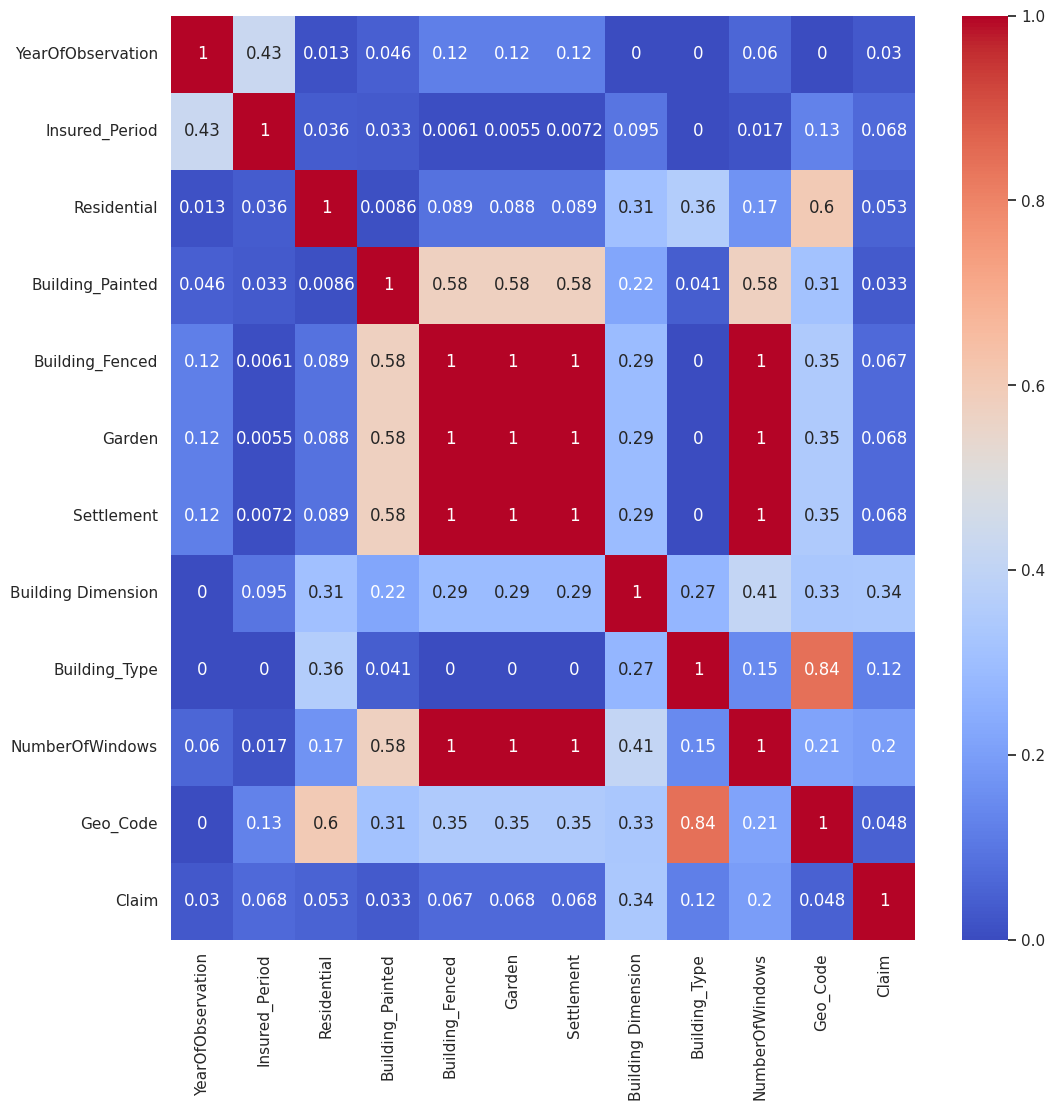

In [ ]:
import seaborn as sns
import numpy as np
data = corr_matrix.astype(float)
sns.set(rc={'figure.figsize':(12,12)})
sns.heatmap(data,annot=True, cmap='coolwarm')

In [ ]:
train_data.drop(columns=['Building_Fenced','Garden','NumberOfWindows',"Geo_Code"], inplace=True)
test_data.drop(columns=['Building_Fenced','Garden','NumberOfWindows',"Geo_Code"], inplace=True)
data.drop(columns=['Building_Fenced','Garden','NumberOfWindows',"Geo_Code"], inplace=True)

---

### ***Encodage des variables catégorielles:***

In [ ]:
building_type_to_num= {
    "Building_Type": {"Non-combustible":0,"Fire-resistive":1,"Ordinary":2,"Wood-framed":3}
}

train_data.replace(building_type_to_num,inplace=True)
test_data.replace(building_type_to_num,inplace=True)
#********************************************************************************************
Building_Painted_to_num= {
    "Building_Painted": {"V":0,"N":1}
}

train_data.replace(Building_Painted_to_num,inplace=True)
test_data.replace(Building_Painted_to_num,inplace=True)
#********************************************************************************************
Settlement_to_num= {
    "Settlement": {"R":0,"U":1}
}

train_data.replace(Settlement_to_num,inplace=True)
test_data.replace(Settlement_to_num,inplace=True)
#********************************************************************************************
Claim_to_num= {
    "Claim": {"non":0,"oui":1}
}

train_data.replace(Claim_to_num,inplace=True)
test_data.replace(Claim_to_num,inplace=True)


### **Apprentissage automatique : construction des modèles** 

In [ ]:
X_train=train_data.drop(columns=["Claim"])
y_train=train_data["Claim"]
X_test=test_data.drop(columns=["Claim"])
y_test=test_data["Claim"]

In [ ]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [ ]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

In [ ]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [ ]:
# MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=700, random_state=42)
mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_test)

In [ ]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [ ]:
# GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

---

### **Validation & Interprétation** 

In [ ]:
lr_accuracy = accuracy_score(y_test, lr_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
mlp_accuracy = accuracy_score(y_test, mlp_pred)
knn_acc = accuracy_score(y_test, knn_pred)
nb_acc = accuracy_score(y_test, nb_pred)

In [ ]:
accuracies = {'Logistic Regression': lr_accuracy, 'Decision Tree': dt_accuracy, 'Random Forest': rf_accuracy, 'MLPClassifier': mlp_accuracy, 'KNN': knn_acc, 'GaussianNB': nb_acc}

best_model = max(accuracies, key=accuracies.get)
print('The best model is:', best_model, 'with an accuracy of', accuracies[best_model])

The best model is: Logistic Regression with an accuracy of 0.7764322310200279


In [ ]:
lr_pre = precision_score(y_test, lr_pred)
dt_pre = precision_score(y_test, dt_pred)
rf_pre = precision_score(y_test, rf_pred)
mlp_pre = precision_score(y_test, mlp_pred)
knn_pre = precision_score(y_test, knn_pred)
nb_pre = precision_score(y_test, nb_pred)

In [ ]:
precision = {'Logistic Regression': lr_pre, 'Decision Tree': dt_pre, 'Random Forest': rf_pre, 'MLPClassifier': mlp_pre, 'KNN': knn_pre, 'GaussianNB': nb_pre}

best_model = max(precision, key=precision.get)
print('The best model is:', best_model, 'with an accuracy of', precision[best_model])

The best model is: Logistic Regression with an accuracy of 0.6590909090909091


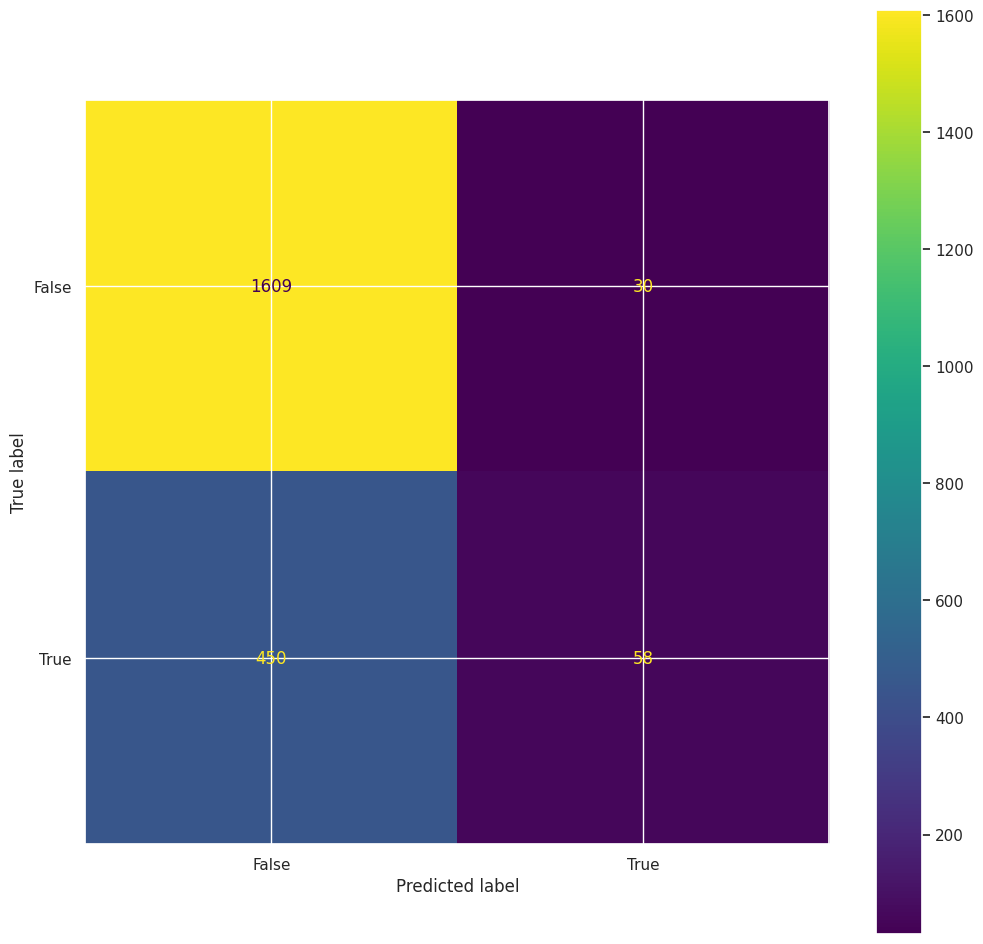

In [ ]:
from sklearn import metrics 
confusion_matrix=metrics.confusion_matrix(y_test,lr_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,display_labels = [False, True]) 
cm_display.plot()
plt.show()

---